# Data Preparation & Cleaning
In this notebook, we will perform data preparation and cleaning tasks on our dataset.


## Import Libraries

In [1]:
!pip install scikit-surprise


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from surprise import Dataset, Reader, NormalPredictor, KNNBasic, KNNWithMeans, SVD, accuracy
from surprise.model_selection import cross_validate

from sklearn.neighbors import NearestNeighbors
plt.style.use('seaborn-colorblind')

np.random.seed(8)
warnings.filterwarnings(action="ignore")

/var/folders/m0/yyj_852j48v3hm1_4hqzgmw40000gn/T/ipykernel_20284/2949908147.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


## Import dataset

In [7]:
import pandas as pd


# Read the first half of the dataset
first_half = pd.read_csv('datasets/rating_01.csv')

# Read the second half of the dataset
second_half = pd.read_csv('datasets/rating_02.csv')

# Concatenate the two halves into a single DataFrame
combined_df = pd.concat([first_half, second_half], ignore_index=True)

# Now you have the combined DataFrame ready for further analysis
print(combined_df.head())


   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1


In [29]:
# df = pd.read_csv('datasets/anime.csv')

# # Display the first few rows of the dataset
# print("First 5 rows of the dataset:")
# print(df.head())

# # Display basic information about the dataset
# print("\nDataset information:")
# print(df.info())

# # Summary statistics
# print("\nSummary statistics:")
# print(df.describe())

df_ratings = pd.read_csv("datasets/rating_1.csv")
df_ratings = pd.read_csv("datasets/rating_2.csv")

display(df_ratings.sample(5, random_state=8))

# print(f"""Number of total ratings: {df_ratings.shape[0]}. 
# Number of different users: {df_ratings.user_id.nunique()}. 
# Number of different animes: {df_ratings.anime_id.nunique()}.""")

,user_id,anime_id,rating
52399292,321373,28907,7
45376670,278396,384,7
56148714,344164,22535,9
15896551,97588,6351,8
21295721,130849,760,8


## Data Cleaning

In [31]:

# Handle missing values
cleaned_df_ratings = df_ratings[df_ratings.rating > 0].iloc[:50000, :]
reader = Reader(line_format='user item rating')
data = Dataset.load_from_df(cleaned_df_ratings, reader)

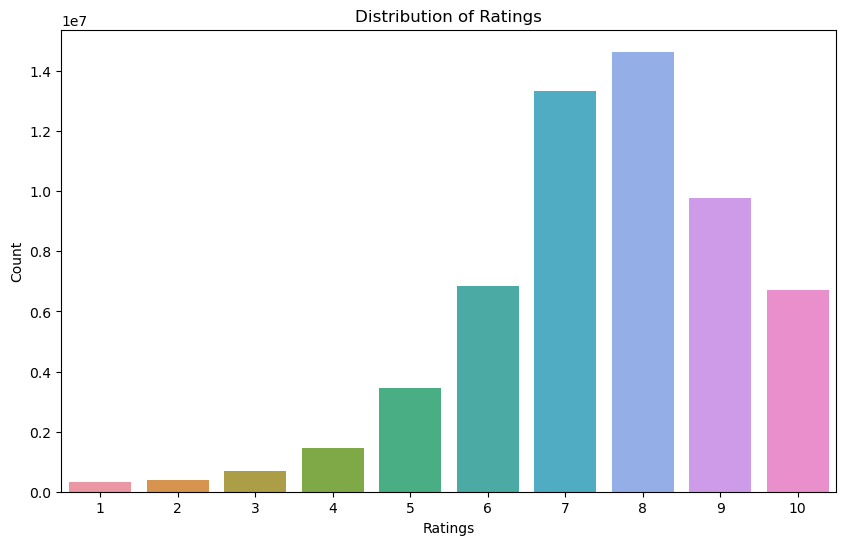

In [26]:
column_to_plot = 'rating'  # The column you want to plot

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ratings, x=column_to_plot)

# Add labels and title
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")

# Show the plot
plt.show()

## Save the Cleaned Dataset

In [28]:


# 7. 
cleaned_file_path = 'datasets/cleaned_ratings.csv'
df.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved to:", cleaned_file_path)


Cleaned dataset saved to: datasets/cleaned_ratings.csv
